# Exercise Sheet 02 (Connectionist Neurons and Multi Layer Perceptrons)

## Group: ALT

### Exercise H2.1:  Connectionist Neuron

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [34]:
#importing and visualizing the data
ds = pd.read_csv('applesOranges.csv')

ds.columns = ['x1','x2','y']

ds.head()


,x1,x2,y
0,0.365,0.708,0
1,0.543,-0.268,0
2,-0.401,0.643,0
3,0.866,-0.796,0
4,-0.386,0.742,0


y= 0 indicates that the sample is that of an “apple”.

y= 1 assigns an observation to “orange”.

 #### a) Plot the data in a scatter plot (x2vs.x1).  Mark the points with different colors to indicate the type of each object.

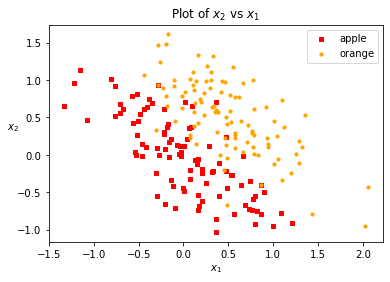

In [35]:
#Separating apples and oranges

y0 = ds[ds.y == 0] #apples
y1 = ds[ds.y == 1] #oranges



fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y0.x1,y0.x2,s=10, c='r', marker="s", label='apple')
ax1.scatter(y1.x1,y1.x2,s=10, color='orange', marker="o" ,label='orange')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("Plot of $x_2$ vs $x_1$")
plt.legend(loc='best');
plt.show()

#### b) For each of these weight w
 (i)  determine % correct classifications ρ of the corresponding neuron and

 (ii)  plot a curve showing ρ as a function of γ

In [36]:
#parameters to be used in the connectionist neuron
theta = 0.

gamma = np.linspace(0,180,19)
gamma_rad = np.radians(gamma)
w = np.vstack((np.cos(gamma_rad),np.sin(gamma_rad))).T

#prepend the bias
w = np.insert(w, 0, theta, axis=1)


inputs = np.vstack((ds.x1,ds.x2)).T

#prepend the bias x0 = 1
inputs = np.insert(inputs, 0, 1., axis=1).T

tot_input = np.matmul(w,inputs)



In [37]:
y_tot = np.heaviside(tot_input, 1)
y_tot

#each line in y_tot corresponds to the predicted value of all y from the data
#for that specific pair of weights
#First line: first pair of weights applied to the entire data

yT = np.asarray(ds.y) #True values of y




In [38]:
equals = (yT==y_tot)
equals

#which of the calculated outputs are equal to the real outputs

array([[False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False, False, False]])

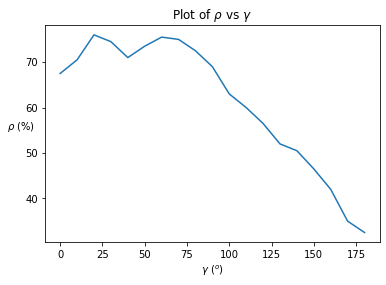

In [39]:
rho_partial = np.sum(equals, axis =1)

rho = (rho_partial/200.)*100 #i-th entry corresponds to the % of right results of the i-th pair of weights

plt.plot(gamma,rho)
plt.xlabel('$\gamma$ $(^{o})$')
plt.ylabel(r'$\rho$ (%)', rotation='horizontal')
plt.title(r"Plot of $\rho$ vs $\gamma$")
plt.show()



In [40]:
rho

array([67.5, 70.5, 76. , 74.5, 71. , 73.5, 75.5, 75. , 72.5, 69. , 63. ,
       60. , 56.5, 52. , 50.5, 46.5, 42. , 35. , 32.5])

#### c) Out of the 19 weight vectors from above, pick the w that yields the best performance. 

In [41]:
# w that yields best performance
max_arg = np.argmax(rho)
max_w = w[max_arg]
print(max_w[1:])

[0.93969262 0.34202014]


#### Now,vary the bias θ∈[−3,3] and pick the value of θ that gives the best performance

In [42]:
theta_vec = -(np.linspace(-3,3,19))
w_line = np.tile(max_w[1:], (19, 1))

theta_w = np.column_stack((theta_vec,w_line))

theta_w

array([[ 3.        ,  0.93969262,  0.34202014],
       [ 2.66666667,  0.93969262,  0.34202014],
       [ 2.33333333,  0.93969262,  0.34202014],
       [ 2.        ,  0.93969262,  0.34202014],
       [ 1.66666667,  0.93969262,  0.34202014],
       [ 1.33333333,  0.93969262,  0.34202014],
       [ 1.        ,  0.93969262,  0.34202014],
       [ 0.66666667,  0.93969262,  0.34202014],
       [ 0.33333333,  0.93969262,  0.34202014],
       [-0.        ,  0.93969262,  0.34202014],
       [-0.33333333,  0.93969262,  0.34202014],
       [-0.66666667,  0.93969262,  0.34202014],
       [-1.        ,  0.93969262,  0.34202014],
       [-1.33333333,  0.93969262,  0.34202014],
       [-1.66666667,  0.93969262,  0.34202014],
       [-2.        ,  0.93969262,  0.34202014],
       [-2.33333333,  0.93969262,  0.34202014],
       [-2.66666667,  0.93969262,  0.34202014],
       [-3.        ,  0.93969262,  0.34202014]])

In [43]:
#multiplying the inputs and the matrix of weights

tot_input_theta = np.matmul(theta_w,inputs)

#inserting into the heaviside function
y_tot_theta = np.heaviside(tot_input_theta, 1)
y_tot_theta

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
#comparing with the true value for y

equals_theta = (yT==y_tot_theta)
equals_theta

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [45]:
#determining the correct classifications

rho_partial_theta = np.sum(equals_theta, axis =1)

rho_theta = (rho_partial_theta/200.)*100
rho_theta

array([50. , 50. , 50. , 50. , 50. , 50. , 50.5, 52. , 60. , 76. , 78.5,
       69. , 57.5, 51.5, 50.5, 50. , 50. , 50. , 50. ])

In [46]:
#choosing the theta that maximizes the percentage of correct classifications

max_arg_theta = np.argmax(rho_theta)
max_w_theta = theta_w[max_arg_theta]

-max_w_theta[0]


0.33333333333333304

Which means that higher performance is achieved with:

w = [0.93969262 , 0.34202014] and 

$\theta$ = 0.333.

#### d) Plot the data points and color them according to the predicted classification when using the w and θ that led to the highest performance. Plot the weight vector w in the same plot. How do you interpret your results?

In [47]:
input_end = np.matmul(max_w_theta,inputs)
y_pred = np.heaviside(input_end, 1)


In [48]:
data_pred = np.vstack((ds.x1,ds.x2, y_pred))

apples = np.array((data_pred[0][data_pred[2]==0],data_pred[1][data_pred[2]==0]))
oranges = np.array((data_pred[0][data_pred[2]==1],data_pred[1][data_pred[2]==1]))


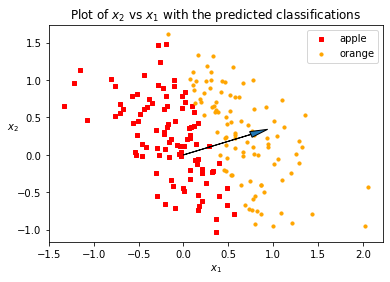

In [49]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)



ax2.scatter(apples[0],apples[1],s=10, c='r', marker="s", label='apple')
ax2.scatter(oranges[0],oranges[1],s=10, color='orange', marker="o" ,label='orange')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("Plot of $x_2$ vs $x_1$ with the predicted classifications")
plt.arrow(0,0, max_w_theta[1],max_w_theta[2],length_includes_head=True,
          head_width=0.08, head_length=0.2 )
plt.legend(loc='best');
plt.show()

_Interpretation:_
The weight vector $\mathbf{w}$ is the normal vector of the hyperplane. Therefore, $\mathbf{w}$ represents the orientation of the hyperplane. As per convention, $\mathbf{w}$ points in the direction of y_pred = 1.

#### e) Find the best combination of w and θ by exploring all combinations of γ and θ (within a reasonable range and precision).  Compute and plot the performance of all combinations in a heatmap.

In [50]:
size = 100
gamma = np.linspace(0,180,size)
gamma_rad = np.radians(gamma)

w = np.vstack((np.cos(gamma_rad),np.sin(gamma_rad))).T
theta_vec = np.linspace(-3,3,size)



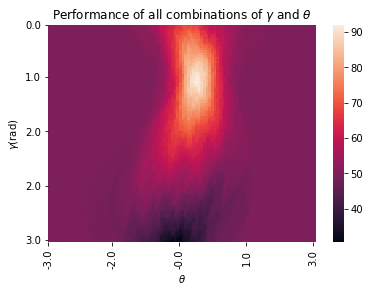

In [51]:
from matplotlib.ticker import FormatStrFormatter

combined = np.zeros((size,size))

for i in range(size):
    for j in range(size):
        weight = np.insert(w[i], 0, -theta_vec[j], axis=0)
        temp_input = np.matmul(weight,inputs)
        temp_y = np.heaviside(temp_input, 1)
        temp_equals = (yT==temp_y)
        temp_performance = np.sum(temp_equals, axis =0)
        performance = (temp_performance/200.)*100
        combined[i][j] = performance
        

num_ticks = 5
# the index of the position of yticks
yticks = np.linspace(0, size - 1, num_ticks, dtype=np.int)
xticks = np.linspace(0, size - 1, num_ticks, dtype=np.int)
# the content of labels of these yticks
xticklabels = [np.round(theta_vec[idx]) for idx in yticks]
yticklabels = [np.round(gamma_rad[idx]) for idx in xticks]


ax = sns.heatmap(combined, yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.set_ylabel('$\gamma$(rad)')
ax.set_xlabel(r'$\theta$')
ax.set_title(r'Performance of all combinations of $\gamma$ and $\theta$')
plt.show()



In [52]:
result = np.where(combined == np.amax(combined))
listOfCordinates = list(zip(result[0], result[1]))

np.amax(combined)

92.0

The best performance is 92% correct classifications. 

In [53]:
best_weight = w[listOfCordinates[0][0]]
best_theta = theta_vec[listOfCordinates[0][1]]

best_weight

array([0.70147489, 0.71269417])

In [54]:
-best_theta

-0.3333333333333335

The combination that yields the best performance is:

w = [0.70147489, 0.71269417]

$\theta$ = 0.333

#### f) Can  the grid-search optimization  procedure  used  in  (e)  be  applied  to  any  classification problem?  Discuss potential problems and give an application example in which the above method must fail.

XOR problem? For a classification problem that is not linearly separable we need a multilayer perceptron, but this means we would have a matrix of weights and a bias for each layer and searching through all the possible combinations has a high computational cost.  

### Exercise H2.2:  Multilayer Perceptrons (MLP)

#### a)  Create 50 independent MLPs with Nhid= 10 hidden units by sampling for each MLP a set of random parameters {w211i,w10i1,bi}, i= 1,...,10.

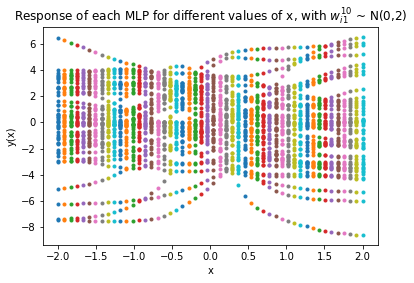

In [55]:
weight21 = np.random.standard_normal((50,10))
weight10 = np.random.normal(loc=0.0, scale=2.0, size=(50,10))
bi = np.random.uniform(low=-2., high=2.0, size=(50,10))

#each row of the above is the parameter for one MLP

def mlp(w21,w10,b,x):
    transf = np.tanh(x*w10 - b)
    nodes = w21*transf
    y = np.sum(nodes,axis=1)
    return y
 
##############################################################################

x = np.linspace(-2,2,50)
y_tot = [mlp(weight21,weight10,bi,x[i]) for i in range(len(x))]


x_expand = np.ones((50,len(x)))*x

for i in range(len(x)):
    plt.plot(x_expand[:,i], y_tot[i], '.')

plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Response of each MLP for different values of x, with $w_{i1}^{10}$ ~ N(0,2)")
plt.show()



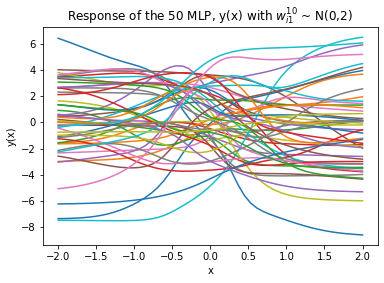

In [56]:

t_2 =  list(zip(*y_tot))
for i in range(50):
    plt.plot(x, t_2[i])
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Response of the 50 MLP, y(x) with $w_{i1}^{10}$ ~ N(0,2)")
plt.show()


#### c) Repeat this procedure using a different intialization scheme for the weights of the hidden neurons: w10i1∼N(0,0.5). What difference can you observe?

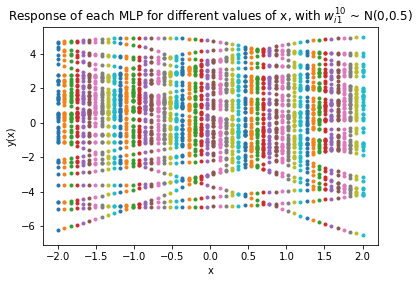

In [57]:
weight105 = np.random.normal(loc=0.0, scale=0.5, size=(50,10)) #changing the weights of the hidden neurons
y_tot_5 = [mlp(weight21,weight105,bi,x[i]) for i in range(len(x))]


for i in range(50):
    plt.plot(x_expand[:,i], y_tot_5[i], '.')

plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Response of each MLP for different values of x, with $w_{i1}^{10}$ ~ N(0,0.5)")
plt.show()

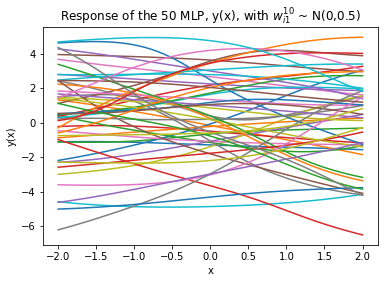

In [58]:
t =  list(zip(*y_tot_5))
for i in range(50):
    plt.plot(x, t[i])
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Response of the 50 MLP, y(x), with $w_{i1}^{10}$ ~ N(0,0.5)")
plt.show()


# What differences can we observe?

## There are less abrupt changes in the values of y(x) when we use $w_{i1}^{10}$ ~ N(0,0.5). But y(x) is still in the same range of values.

#### d)Compute the mean squared error (MSE) between each of these 2×50 (50 from each of the above two initialization procedures) input-output functions and the functiong(x) =−x.For each of the two initialization procedures, which MLP approximates g best?  Plot y(x) for these two MLPs.

In [59]:
gT = -x #true values of the function 
t =  list(zip(*y_tot_5))
t_2 =  list(zip(*y_tot))

MSE = np.zeros((50,2))

for j in range(50):
    MSE[j][0] = (1/len(gT))*np.sum((gT - t_2[j])**2)
    MSE[j][1] = (1/len(gT))*np.sum((gT - t[j])**2)
        
#Finding the minimimum MSE 
min_2 = np.min(MSE[:,0]) #min MLP with N(0,2)
min_5 = np.min(MSE[:,1]) #min MLP with N(0,0.5)

print(min_2,min_5)



0.3983956823676351 0.08920822670169504


In [60]:
#The minimum corresponds to the MLP
mlp_2 = np.argmin(MSE[:,0])
mlp_5 = np.argmin(MSE[:,1])

print(mlp_2,mlp_5)


8 1


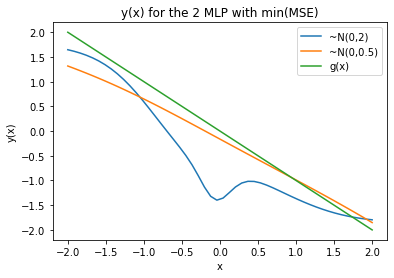

In [61]:
plt.plot(x, t_2[mlp_2], label='~N(0,2)')
plt.plot(x, t[mlp_5], label='~N(0,0.5)')
plt.plot(x,gT,label='g(x)')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.title("y(x) for the 2 MLP with min(MSE)")
plt.show()